# Event logging

In [1]:
import os

from datetime import date
from datetime import time
from datetime import datetime as dt

In [2]:
def logfile(user=os.environ.get('JUPYTERHUB_USER') or 'jovyan'):
    prefix='/srv'
    if os.path.isdir(prefix) and os.access(prefix, os.W_OK):
        prefix+=('/'+user)
        if not os.path.isdir(prefix):
            os.makedirs(prefix)
    else:
        prefix='.'
    return prefix+'/'+dt.now().strftime('%Y%m%d')+'.log'

In [9]:
logfile()

'./20220408.log'

In [3]:
path=logfile()
%logstop
%logstart -otq $path

In [11]:
%logstate

Filename       : ./20220408.log
Mode           : backup
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active


```{attention}
この記録を次のようにグラフ化します。
```

In [24]:
import pandas as pd
import numpy as np

def activity(user=os.environ.get('JUPYTERHUB_USER') or 'jovyan'):
    ds = np.empty(0)
    with open(logfile(user), 'r') as f:
        for line in f:
            try:
                d = dt.strptime(line, "# %a, %d %b %Y %H:%M:%S ")
                ds = np.append(ds,pd.Timestamp(d))
            except:
                pass
    return pd.Series(np.ones(len(ds)), ds)


from matplotlib import pyplot as plt
import seaborn as sns

sns.set()

def plot_ax(ax, user=''):
    sns.scatterplot(ax=ax, data = activity(user), alpha=0.2, s=1000, edgecolor='none')
    ax.set_ylabel(user, rotation=0, ha="right", va="center")

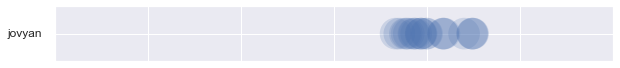

In [30]:
# single user
fig = plt.figure(figsize=(10,1))
ax = fig.add_subplot(1,1,1)

plt.setp(ax, xlim=(pd.Timestamp(dt.combine(date.today(),time(19,))),pd.Timestamp(dt.combine(date.today(),time(20,)))))
plt.setp(ax, ylim=(0,2))
plt.setp(ax, xticklabels=[])
plt.setp(ax, yticklabels=[])

plot_ax(ax, user='jovyan')

In [294]:
ids='''
u187337i
u267723d
u998138i
u938910d
u516373c
u934432e
u280226g
u753942g
u173931e
u538415j
u793727e
u838422k
u231298c
u494246k
u029695j
u954207e
u511882g
'''
users=ids.strip().splitlines()

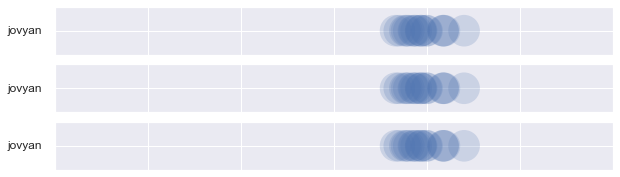

In [27]:
# multiple users
users=['jovyan', 'jovyan', 'jovyan']
fig, axes = plt.subplots(len(users),1,figsize=(10,len(users)))

plt.setp(axes, xlim=(pd.Timestamp(dt.combine(date.today(),time(19,))),pd.Timestamp(dt.combine(date.today(),time(20,)))))
plt.setp(axes, ylim=(0,2))
plt.setp(axes, xticklabels=[])
plt.setp(axes, yticklabels=[])

for i in range(len(users)):
    plot_ax(axes[i], users[i])

```{attention}
この講義では、受講者の操作を記録し、授業進行の指標とします。
そのためノートブックの最初に次のセルを追加しています。
ノートブックを読み込んだときに、これらのセルが自動実行されるように付加情報を埋め込んでいますが、
それが機能するように、もう一つの手順が必要です。

ノートブックを最初に読み込んだときに、右肩に "Not Trusted" と表示されています。
今回の授業で配信するノートブックを予め信頼し "Trusted" 状態にする必要があります。
```